In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import svm, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.linear_model as sk
from sklearn.preprocessing import OneHotEncoder
import numpy.random
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv(r"property_data.csv")
df.head()

,zip,province,building_type,bedroom,construction_Year,price,heating_type,land_surface
0,2940,Antwerp,HOUSE,3,1955,250000,ELECTRIC,340
1,2070,Antwerp,HOUSE,3,1955,389000,GAS,256
2,2910,Antwerp,HOUSE,3,1947,285000,GAS,427
3,2950,Antwerp,HOUSE,5,1950,299000,GAS,140
4,2300,Antwerp,HOUSE,3,2022,421400,GAS,324


In [3]:
df.shape

(8779, 8)

In [5]:
df['province'].unique()

array(['Antwerp', 'Brussels', 'East Flanders', 'Flemish Brabant',
       'Hainaut', 'Limburg', 'Liège', 'Luxembourg', 'Namur',
       'Walloon Brabant', 'West Flanders'], dtype=object)

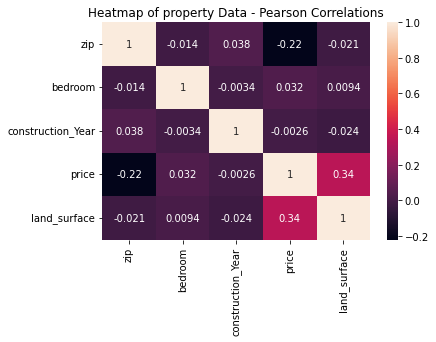

In [12]:
correlations = df.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Heatmap of property Data - Pearson Correlations');

In [13]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['zip','province','building_type','heating_type']]).toarray())

#merge one-hot encoded columns back with original DataFrame
df = df.join(encoder_df)

#view final df
print(df)


       zip       province building_type  bedroom  construction_Year   price  \
0     2940        Antwerp         HOUSE        3               1955  250000   
1     2070        Antwerp         HOUSE        3               1955  389000   
2     2910        Antwerp         HOUSE        3               1947  285000   
3     2950        Antwerp         HOUSE        5               1950  299000   
4     2300        Antwerp         HOUSE        3               2022  421400   
...    ...            ...           ...      ...                ...     ...   
8774  8770  West Flanders         HOUSE        5               1946  475000   
8775  8790  West Flanders         HOUSE        3               1978  795000   
8776  8000  West Flanders         HOUSE        4               2006  665000   
8777  8760  West Flanders         HOUSE        4               2002  575000   
8778  8430  West Flanders         HOUSE        2               1997  588000   

     heating_type  land_surface    0    1  ...  910

In [14]:
df.drop(['zip','province','building_type','heating_type'], axis=1, inplace=True)
#view final df
df.head()

,bedroom,construction_Year,price,land_surface,0,1,2,3,4,5,...,910,911,912,913,914,915,916,917,918,919
0,3,1955,250000,340,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3,1955,389000,256,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1947,285000,427,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5,1950,299000,140,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3,2022,421400,324,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
x = df.drop('price', axis=1)
#x = sklearn.preprocessing.normalize(x)
y = df['price']
x

,bedroom,construction_Year,land_surface,0,1,2,3,4,5,6,...,910,911,912,913,914,915,916,917,918,919
0,3,1955,340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3,1955,256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1947,427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5,1950,140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3,2022,324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8774,5,1946,832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8775,3,1978,1592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8776,4,2006,434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8777,4,2002,958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
#split into train test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7023, 923) (1756, 923) (7023,) (1756,)


In [17]:
#fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor()

In [18]:
model.score(X_train, y_train)

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.9589082112777269

In [19]:
model.score(X_test, y_test)

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.7096971181529096

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


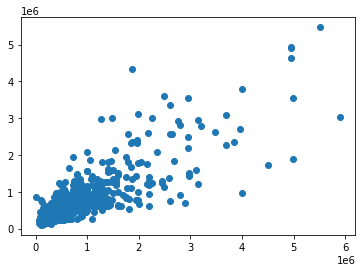

In [20]:
plt.scatter(y_test, model.predict(X_test))